<a href="https://colab.research.google.com/github/kreshuklab/vem-primer-examples/blob/main/mitochondria/2_semantic_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # vEM-Mitochondria: Semantic Segmentation
 
 Lorem ipsum

## Google Colab

IMPORTANT: Run the next cells until `Semantic Segmentation` only if you execute this notebook on Google Colab. If you run this notebook locally, you need to set up a python environment with the correct dependencies beforehand, check out [these instructions](https://github.com/kreshuklab/vem-primer-examples#setting-up-conda-environments-advanced).

**Create a session with GPU support:**
- Select `Runtime->Change runtime type`
- In the menu that opens up, select `Hardware accelerator->GPU` and `Save`

In [ ]:
# install additional dependencies
# note that this will automatically restart the session, you don't need to do anything despite some error messages that may be displayed
!pip install bioimageio.core zarr

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")

## Semantic Segmentation

Lorem ipsum

In [32]:
# import all the required dependencies
%matplotlib inline
import bioimageio.core
import matplotlib.pyplot as plt
import xarray as xr
import zarr
from numcodecs import GZip

In [ ]:
# RUN THIS IF YOU WORK LOCALLY
data_path = "vem-primer-data/MitoEM-H-cropped.ome.zarr"
# use the path below to run segmentation for the full volume instead of the crop
# data_path = "vem-primer-data/MitoEM-H.ome.zarr"

In [ ]:
# RUN THIS ON GOOGLE COLAB
data_path = "/content/gdrive/MyDrive/vem-primer-data/MitoEM-H-cropped.ome.zarr"

In [18]:
# TODO use model from bioimageio
model_doi = "/g/kreshuk/pape/Work/my_projects/torch-em/experiments/exported_models/mito-em/rdf.yaml"
model = bioimageio.core.load_resource_description(model_doi)

/g/kreshuk/pape/Work/bioimageio/python-bioimage-io/bioimageio/core/resource_io/utils.py:309: UserWarning: found cached /tmp/bioimageio_cache/https/github.com/constantinpape/torch-em.git. Skipping download of https://github.com/constantinpape/torch-em.git.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.")


In [24]:
store = zarr.DirectoryStore(data_path)
# TODO update this s.t. the bioimageio.core tiling functionality works out of core
with zarr.open(store, "a") as f:
    input_ = xr.DataArray(f["s0"][:][None, None], dims=model.inputs[0].axes)
    with bioimageio.core.create_prediction_pipeline(bioimageio_model=model, devices=["cuda"]) as pp:
        output = bioimageio.core.prediction.predict_with_tiling(pp, input_, tiling=True, verbose=True)[0][0]
    foreground, boundaries = output[0], output[1]
    f.create_dataset("predictions/foreground", data=foreground.values, chunks=(10, 256, 256), compression=GZip())
    f.create_dataset("predictions/boundaries", data=boundaries.values, chunks=(10, 256, 256), compression=GZip())

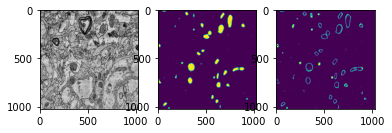

In [30]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(input_[0, 0, 10], cmap="gray")
ax[1].imshow(foreground[10])
ax[2].imshow(boundaries[10])
plt.show()